# **Flower Recognition** 🌸 
### Author : Kalyani Avhale
  - **Task** : Recognize what kind of flower is that?

  - **Dataset** : contains 4242 images of flowers.
  - The pictures are divided into five classes: chamomile, tulip, rose, sunflower, dandelion.
  - For each class there are about 800 photos. Photos are not high resolution, about 320x240 pixels. Photos are not reduced to a single size, they have different proportions!
  
### Dataset source : https://www.kaggle.com/alxmamaev/flowers-recognition

### Objective/Methodology
In this notebook, we adopt a deep convolution neural network (CNN) approach for classifying images to five classes. It highlights a step by step approach on how to implement a deep CNN to perform image classification problem on flower recogination and the implementation of Transfer Learning technique .

The implementation methodology is as follows:

1. Import required LIBRARIES and Load the DATSET
    1. Downloading and unzipping folder to access images


2. Exploratory Data Analysis 
    1. Visualising and counting the number of images in each train,val and test images


3. Pre-Processing - Data Augmentation
    1. Augmenting the existing data by using zoom, shear, flip.. parameters of ImageDataGenerator
    2. Creating a Training, Validation and Testing dataset using Flow_from_directory method of ImageDataGenerator and batch size.
    

4. CNN Model Building:
    1. Model Architecture
    2. Model Summary
    3. Visualize model Layers
    4. Defining Callbacks 
    5. Model Compilation
    6. Training the model
    7. Visualize Training Performance
   
   
5. Testing

        
6. Transfer Learning using pre-trained model
   1. Define VGG16 Base Model
   2. Adding fully connected custom layers and compile
   3. Training the model
   4. Visualize the performance results
   5. Evaluate the Model
   6. Peredictions
   7. Plot Prediction results

7. Deploy model - Test model by uploading random images

8. Conclusion

9. References




## **1. Import required libraries and Load the dataset**

In [ ]:
#mount Google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#library split-folders to create train test and validation folders split
!pip install -q split-folders

In [ ]:
#library to create UI components to depoly and test the model
!pip install -q gradio

In [ ]:
#import required libraries 

#libraries required to work on directories processing 
import os
import zipfile
import splitfolders 
import time

#read images and plot visualizations
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

#libraries required for creating CNN model
import tensorflow as tf
import keras
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

# for callbacks
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.callbacks import ReduceLROnPlateau

#for transfer learning 
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import  MobileNetV2, ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input as preprocess_input_resnet50
from tensorflow.keras.applications.vgg16 import preprocess_input as preprocess_input_vgg16
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input as preprocess_input_mobilenetv2

#for creating UI components 
import gradio as gr 
import requests


### ***Create Train test and Validation directories***

In [ ]:
#extarct Dataset zip files from Google Drive to /tmp/ folder 📂 
# We can download and use dataset directly from Kaggle using Kaggle API 

local_zip = '/content/drive/MyDrive/Colab Notebooks/Datasets/Flowers.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

In [ ]:
!ls ../tmp/flowers #list the directory files

daisy  dandelion  rose	sunflower  tulip


In [ ]:
# Split the Dataset folders into train test val folders
splitfolders.ratio("../tmp/flowers", output="output", seed=100, ratio=(.7, .2, .1), group_prefix=None) 

Copying files: 4317 files [00:01, 2775.17 files/s]


In [ ]:
!ls  ./output #list generated directories 

test  train  val


## **2. Exploratry Data Analysis**

### ***2.1 Counting number of images in each class for Train and Test Data***

In [ ]:
#Training data

#create paths for each folders
daisy_dir = os.path.join('/content/output/train/daisy')
dandelion_dir = os.path.join('/content/output/train/dandelion')
rose_dir = os.path.join('/content/output/train/rose')
sunflower_dir = os.path.join('/content/output/train/sunflower')
tulip_dir = os.path.join('/content/output/train/tulip')

#create list of image path
daisy_files = os.listdir(daisy_dir)
dandelion_files = os.listdir(dandelion_dir)
rose_files = os.listdir(rose_dir)
sunflower_files = os.listdir(sunflower_dir)
tulip_files = os.listdir(tulip_dir)

print("Total len of training images",len(daisy_files+dandelion_files+rose_files+sunflower_files+tulip_files),'\n')


Total len of training images 3019 



In [ ]:
#Test data

#create paths for each folders
daisy_dir_test = os.path.join('./output/test/daisy')
dandelion_dir_test = os.path.join('./output/test/dandelion')
rose_dir_test = os.path.join('./output/test/rose')
sunflower_dir_test = os.path.join('./output/test/sunflower')
tulip_dir_test = os.path.join('./output/test/tulip')

#create list of image path
daisy_files_test = os.listdir(daisy_dir_test)
dandelion_files_test = os.listdir(dandelion_dir_test)
rose_files_test = os.listdir(rose_dir_test)
sunflower_files_test = os.listdir(sunflower_dir_test)
tulip_files_test = os.listdir(tulip_dir_test)

print("Total len of test images",len(daisy_files_test+dandelion_files_test+rose_files_test+sunflower_files_test+tulip_files_test),'\n')

Total len of test images 438 



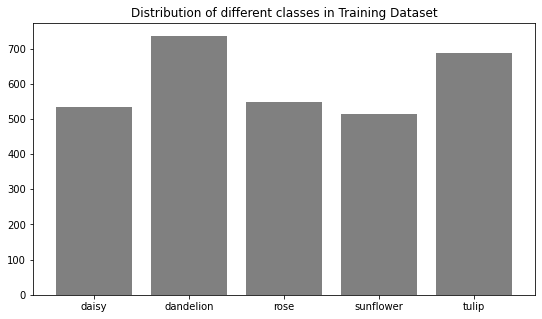

In [ ]:
#plot count of images for each class

# creating a dictionary of the images in train dataset: values = number of images; key = Folder name
image_folder = ['daisy', 'dandelion','rose','sunflower','tulip']
dict_imgs = {}              
for i in image_folder:
    nimages = len(os.listdir('/content/output/train/'+i))
    dict_imgs[i]=nimages


# plotting a bargraph
plt.figure(figsize=(9, 5))
plt.bar(range(len(dict_imgs)), list(dict_imgs.values()), align='center',color='grey')
plt.xticks(range(len(dict_imgs)), list(dict_imgs.keys()))
plt.title('Distribution of different classes in Training Dataset')
plt.show()

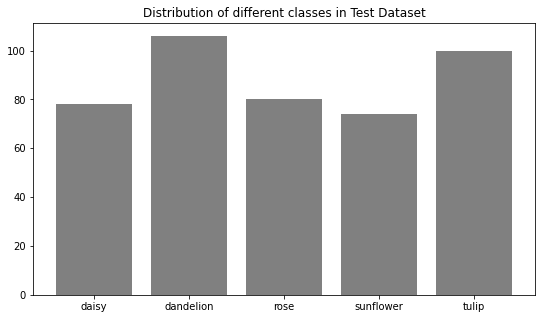

In [ ]:
#plot count of images for each class

# creating a dictionary of the images in train dataset: values = number of images; key = Folder name
image_folder = ['daisy', 'dandelion','rose','sunflower','tulip']
dict_imgs = {}              
for i in image_folder:
    nimages = len(os.listdir('/content/output/test/'+i))
    dict_imgs[i]=nimages


# plotting a bargraph
plt.figure(figsize=(9, 5))
plt.bar(range(len(dict_imgs)), list(dict_imgs.values()), align='center',color='grey')
plt.xticks(range(len(dict_imgs)), list(dict_imgs.keys()))
plt.title('Distribution of different classes in Test Dataset')
plt.show()

### ***2.2 Visualization***

In [ ]:
#to plot images get complete paths for images
pic_index = 10

#get paths for some of the immages from each folder
daisy_fewimg = [os.path.join(daisy_dir,fname) for fname in daisy_files[pic_index-10:pic_index]]
dandelion_fewimg = [os.path.join(dandelion_dir,fname) for fname in dandelion_files[pic_index-10:pic_index]]
rose_fewimg = [os.path.join(rose_dir,fname) for fname in rose_files[pic_index-10:pic_index]]
sunflower_fewimg = [os.path.join(sunflower_dir,fname) for fname in sunflower_files[pic_index-10:pic_index]]
tulip_fewimg = [os.path.join(tulip_dir,fname) for fname in tulip_files[pic_index-10:pic_index]]


(240, 320, 3)


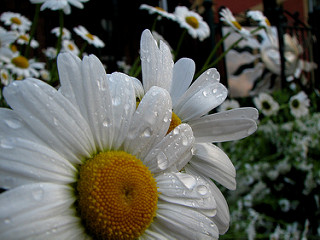

In [ ]:
#plot random image 
import PIL.Image as Image

print(cv2.imread(daisy_fewimg[0]).shape)
Image.open(daisy_fewimg[0])

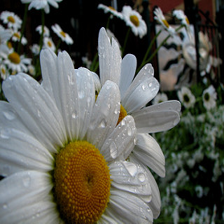

In [ ]:
#since we have different size of images , resize them to perfom our model well
Image.open(daisy_fewimg[0]).resize((224,224))

#### PLot images for each class

In [ ]:
#function to convert BGR image to RGB 
def cvtRGB(img):
    return cv2.cvtColor(img.copy(), cv2.COLOR_BGR2RGB)


#plot smaple of images function
def plot_img(imgpath_list):
  fig, ax = plt.subplots(3,3,figsize=(10,10))
  k = 0
  for j in range(3):
    for i in range(3):
        img = cv2.resize(cv2.imread(imgpath_list[k]),(224,224))
        k=k+1
        ax[i,j].imshow(cvtRGB(img));
        ax[i,j].axis('off');

				Daisy


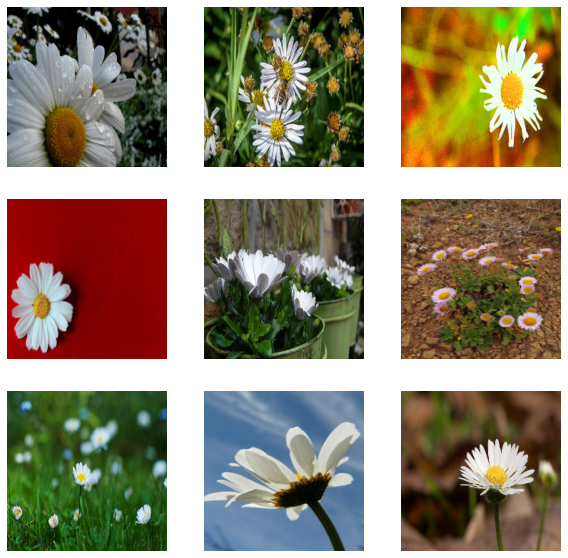

In [ ]:
print('\t\t\t\tDaisy')
plot_img(daisy_fewimg)

				Dadelion


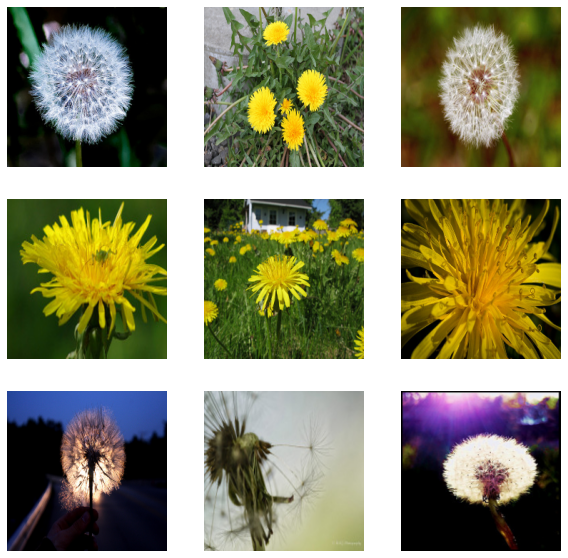

In [ ]:
print('\t\t\t\tDadelion')
plot_img(dandelion_fewimg)

				Rose


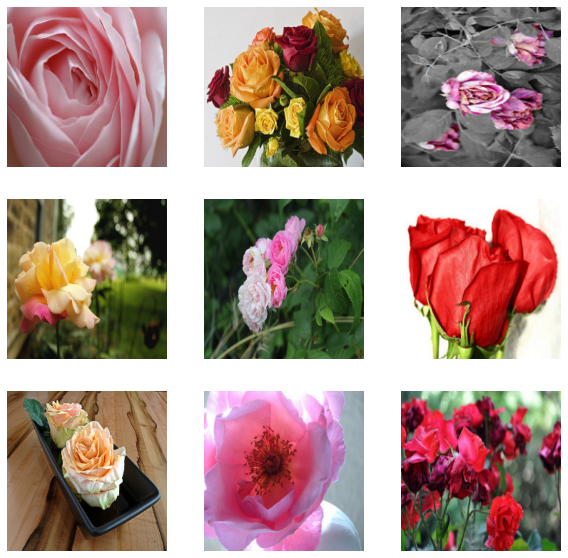

In [ ]:
print('\t\t\t\tRose')
plot_img(rose_fewimg)

				Tulip


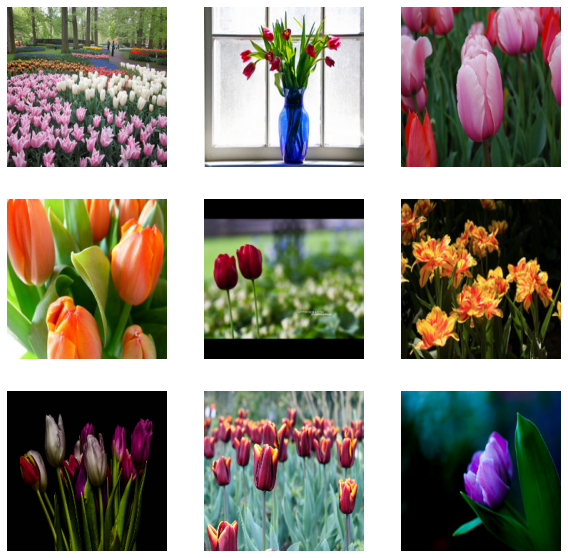

In [ ]:
print('\t\t\t\tTulip')
plot_img(tulip_fewimg)

				Sunflower


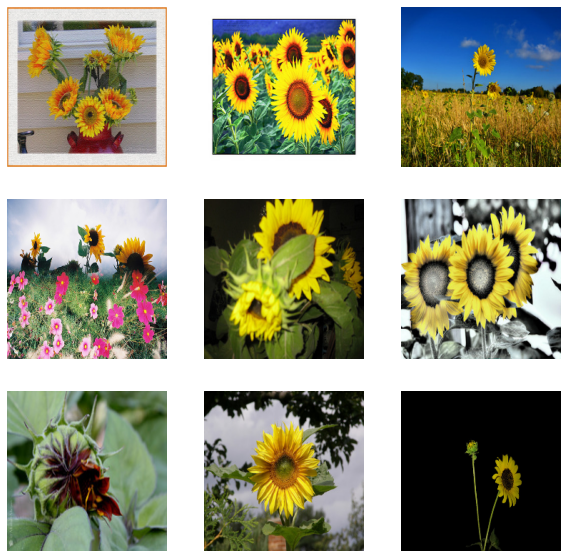

In [ ]:
print('\t\t\t\tSunflower')
plot_img(sunflower_fewimg)

**Few images has other objects present**

## **3. Pre-Processing  - Data Augumentation**

**Data augmentation is used to increase the size of training set and to get more different image. Through Data augmentation we can prevent overfitting ,this refers to randomly changing the images in ways that shouldn’t impact their interpretation, such as horizontal flipping, zooming, and rotating**
**Below image shows transformation on the original image**


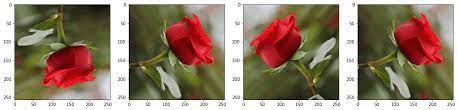

### ***3.1 ImageDataGenerator*** 

In [ ]:
#image Augumentation using ImageDataGenerator on train data 
training_dir = './output/train/'
training_datagen = ImageDataGenerator(
    rescale = 1./255, #normalization
    rotation_range = 40, #rotate img
    width_shift_range = 0.4, #shift to left or right(horizontal shifts)
    height_shift_range = 0.4, #shift images to up or down(vertically)
    shear_range = 0.2, #Shear angle in counter-clockwise direction in degrees
    zoom_range = 0.1, #zoom 🔎 
    fill_mode = 'nearest', # It sets rules for newly shifted pixel in the input area
    horizontal_flip = True) #flip immage horizontally

In [ ]:
#do not perform augmentation on validation and test data/validation set ,this might mislead the results
validation_dir = './output/val'
validation_datagen = ImageDataGenerator(
    rescale=1./255 #normalization
)

test_dir = './output/test'
test_datagen = ImageDataGenerator(
    rescale=1./255 #normalization
)

In [ ]:
#flow_from_directory() method allows you to read the images directly from the directory and augment them while the neural network model is learning on the training data.
train_generator = training_datagen.flow_from_directory(
    training_dir, #Directory where the data is located
    target_size = (224,224), #rescale images to fixed size if the images vary in size(this size has been selected for traing data on pre-trained models)
    class_mode = 'categorical', #multiclass 
    batch_size = 32 #Size of the batches of data
)
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size = (224,224),
    class_mode = 'categorical',
    batch_size = 32
)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (224,224),
    class_mode = 'categorical',
    batch_size = 32
)

Found 3019 images belonging to 5 classes.
Found 860 images belonging to 5 classes.
Found 438 images belonging to 5 classes.


In [ ]:
tf.keras.backend.clear_session()

## **4. CNN Model Building**

A Convolutional Neural Network (ConvNet/CNN) is a Deep Learning algorithm which can take in an input image, assign importance (learnable weights and biases) to various aspects/objects in the image and be able to differentiate one from the other. The pre-processing required in a ConvNet is much lower as compared to other classification algorithms. While in primitive methods filters are hand-engineered, with enough training, ConvNets have the ability to learn these filters/characteristics.

### ***4.1 Model Architecture*** 

A convolutional neural network can have tens or hundreds of layers that each learn to detect different features of an image. Filters are applied to each training image at different resolutions, and the output of each convolved image is used as the input to the next layer. The filters can start as very simple features, such as brightness and edges, and increase in complexity to features that uniquely define the object.


Here,
*The model consists of 3 (Convoluion + Pooling layers + Dropout) layers with a Dense layer. The activation function used was "Relu".*

A CNN architecture comprises of multiple neural layers. The three main type of layers used are:

 

  1. **Convolution layers :**
Convolutional layers are the layers where filters are applied to the original image, or to other feature maps in a deep CNN. This is where most of the user-specified parameters are in the network. The most important parameters are the number of kernels and the size of the kernels.

   The convolution operation Paramters of Conv2D are : 

*  The filter/Kernel size used in each convolution layer: size (3,3)
*  The first parameter is the number of filters
*  Input shape is the tensor image (RGB) input from the training_datagen
*  Padding used is of type 'same' (default)
*  Activation is applied after convolution occurs (Relu is used)

As the architecture deepens the number of filters are increased to extract minute features from the images.

  2. **Pooling layers :**
  A pooling layer is another building block of a CNN. Its function is to progressively reduce the spatial size of the representation to reduce the amount of parameters and computation in the network. Pooling layer operates on each feature map independently. The most common approach used in pooling is max pooling.The filter size used in each MaxPool2D: size (2,2)

  3. **Dropout Layer :**
  Dropout is a regularization technique that prevents neural networks from overfitting. Regularization methods like L1 and L2 reduce overfitting by modifying the cost function. Dropout on the other hand, modify the network itself. It randomly drops neurons from the neural network during training in each iteration

  4. **Dense Layers :**
   The Fully connected dense layer are usually placed before the output dense layer and form the last few layers of a CNN Architecture. In this layer, the input image from the previous layers are flattened and fed to the fully connected layer. In this stage, the classification process begins to take place. The output layer is the last dense layer in the CNN architecture. It has 5 neuron for a multiclass classification problem and the activation function of "softmax" is used.



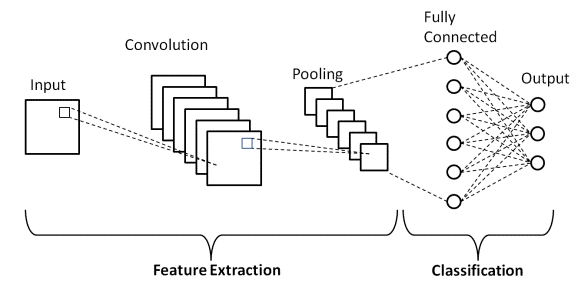

In [ ]:
# Build CNN sequential model and train from scratch 
def model_from_scratch():
  #Build model
  model = tf.keras.models.Sequential([
              tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (224,224,3)), #input layer and 1st layer(conv2D+pooling+dropout)
              tf.keras.layers.MaxPool2D(2,2),
              tf.keras.layers.Dropout(0.5),

              tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),#layer 2
              tf.keras.layers.MaxPool2D(2,2),
              tf.keras.layers.Dropout(0.5),

              tf.keras.layers.Conv2D(128, (3,3), activation = 'relu'), #layer 3
              tf.keras.layers.MaxPool2D(2,2),
              tf.keras.layers.Dropout(0.5),
              
              tf.keras.layers.Flatten(),
              tf.keras.layers.Dropout(0.5),
              tf.keras.layers.Dense(512, activation = 'relu'), #Dense layer(fully connected layer)
              tf.keras.layers.Dense(5, activation = 'softmax') #output layer
  ])

  
  return model


### ***4.2 Model Summary*** 

In [ ]:
#Model Summary :View all the layers of the network
model = model_from_scratch()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 128)       7

### ***4.3 Visualize the network layers***

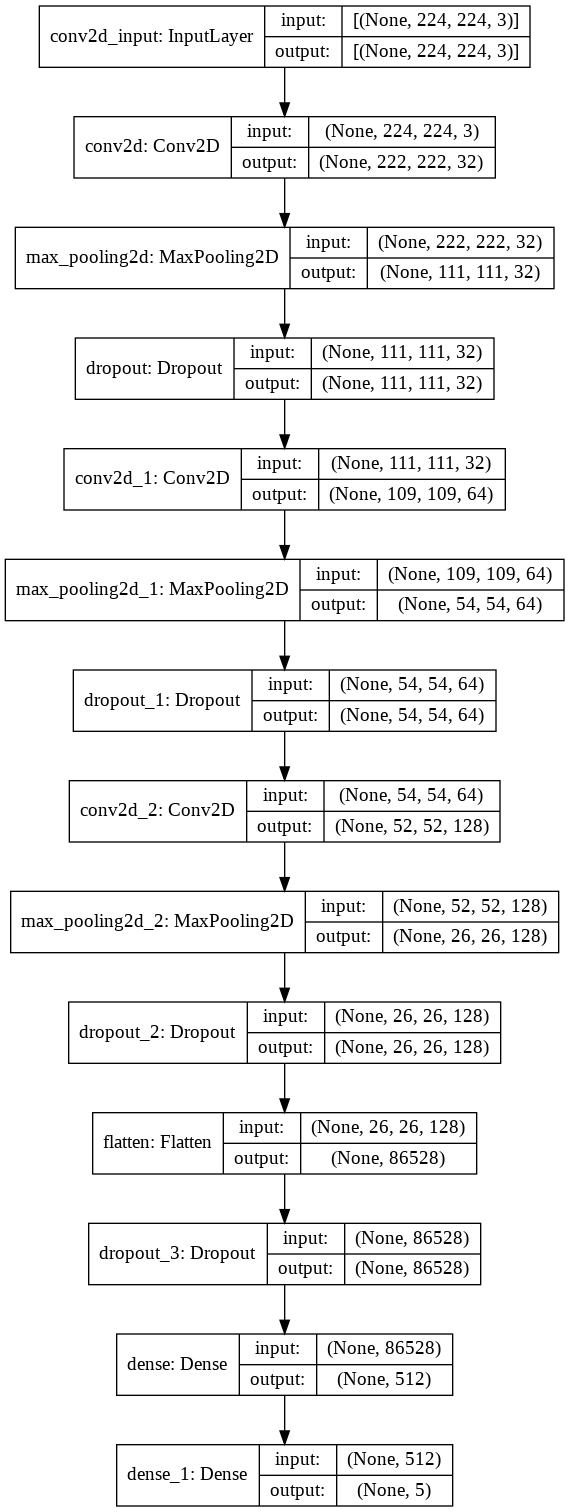

In [ ]:
#view layers of network in visual form
tf.keras.utils.plot_model(model,to_file='model.png',show_shapes=True)

### ***4.4 Defining the callbacks***

In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_accuracy',
                                            patience = 4, # if for the past 3 epochs, the accuracy remians constant
                                            factor = 0.6, # decrease the learning rate by 0.6
                                            min_lr = 0.00001)
# Defining Callbacks

filepath = './best_weights.hdf5'
checkpoint_model    = ModelCheckpoint(filepath, 
                                monitor = 'val_accuracy', 
                                mode='max', # model with maximum val_accuracy is saved
                                save_best_only=True,  #save model with best weights
                                verbose = 1)

callback_list = [learning_rate_reduction, checkpoint_model]


### ***4.5 Model Compilation***

In [ ]:
#model compilation
model.compile(loss='categorical_crossentropy', #since its multiclass problem
              optimizer = tf.keras.optimizers.Adam(), #one of the best optimizers 
              metrics = ['accuracy'] #performance metrics used
            )

### ***4.6 Train the Model***

In [ ]:
#fit model to train dataset 
epochs = 25
start = time.time()

#fitting a model(training a model)
history1 = model.fit(train_generator, #Input train data
                    epochs=epochs, #number of epochs
                    validation_data=validation_generator,#validation data
                    validation_steps=5, # Total number of steps (batches ofsamples) to draw before stopping when performing validationat the end of every epoch.
                    verbose=1,
                    callbacks = callback_list # giving the callback list 
                     )

end = time.time()
duration = end - start
print ('\n Model built from scratch training took %0.2f seconds (%0.1f minutes) to train for %d epochs'%(duration, duration/60, epochs) )

Epoch 1/25
95/95 [==============================] - 51s 491ms/step - loss: 2.4229 - accuracy: 0.2445 - val_loss: 1.5983 - val_accuracy: 0.3063

Epoch 00001: val_accuracy improved from -inf to 0.30625, saving model to ./best_weights.hdf5
Epoch 2/25
95/95 [==============================] - 47s 491ms/step - loss: 1.5981 - accuracy: 0.2551 - val_loss: 1.5593 - val_accuracy: 0.3187

Epoch 00002: val_accuracy improved from 0.30625 to 0.31875, saving model to ./best_weights.hdf5
Epoch 3/25
95/95 [==============================] - 47s 491ms/step - loss: 1.4371 - accuracy: 0.3713 - val_loss: 1.4387 - val_accuracy: 0.3313

Epoch 00003: val_accuracy improved from 0.31875 to 0.33125, saving model to ./best_weights.hdf5
Epoch 4/25
95/95 [==============================] - 46s 488ms/step - loss: 1.3606 - accuracy: 0.4015 - val_loss: 1.3417 - val_accuracy: 0.4062

Epoch 00004: val_accuracy improved from 0.33125 to 0.40625, saving model to ./best_weights.hdf5
Epoch 5/25
95/95 [=========================

### ***4.7 Visualize model performance***

In [ ]:
#function to get accuracy and loss from history 
def get_history_data(history):
    
  train_acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  train_loss = history.history['loss']
  val_loss = history.history['val_loss']

  return train_acc,val_acc,train_loss,val_loss

In [ ]:
train_acc,val_acc,train_loss,val_loss = get_history_data(history1)

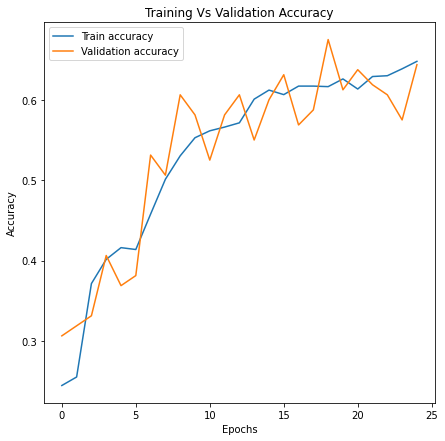

In [ ]:
#plot Accuracy graph
epochs = range(len(train_acc))
plt.figure(figsize=(7,7));
plt.plot(epochs,train_acc,label ='Train accuracy');
plt.plot(epochs,val_acc,label ='Validation accuracy');
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend();
plt.title('Training Vs Validation Accuracy');

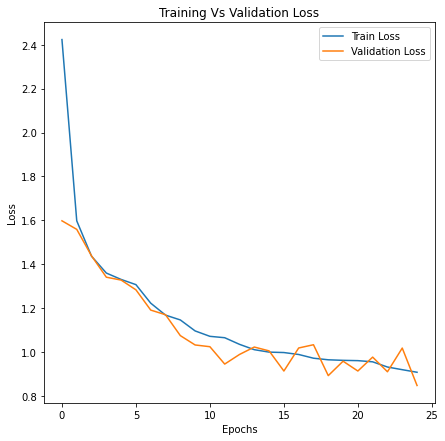

In [ ]:
#plot validation graph
plt.figure(figsize=(7,7));
plt.plot(epochs,train_loss,label ='Train Loss');
plt.plot(epochs,val_loss,label ='Validation Loss');
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend();
plt.title('Training Vs Validation Loss');

**From above plots , Increasing number of epochs and few adding few layers would have improved performance** 

## **5. Testing Model**

### ***5.1 Evaluate the Model***

In [ ]:
#check how model performs on test data(unseen data)
model.evaluate(test_generator)

14/14 [==============================] - 2s 142ms/step - loss: 0.8734 - accuracy: 0.6872


[0.8733857870101929, 0.6872146129608154]

### ***5.2 Perform Prediction on Test Data***

In [ ]:
import numpy as np

pred=model.predict(test_generator)
pred_digits=np.argmax(pred,axis=1)
pred_digits[:5]

array([2, 3, 1, 4, 1])

### ***5.3 Plot Correctly Calssified Images and Miss-Classified Images***

In [ ]:
# now storing some properly as well as misclassified indexes'.
i=0
prop_class=[]
prop_imgPaths=[]
mis_class=[]
mis_imgPath=[]

for i in range(len(test_generator.classes)):
    if(np.argmax(test_generator.classes[i])==pred_digits[i]):
        prop_class.append(i)
        prop_imgPaths.append(test_generator.filepaths[i])
    if(len(prop_class)==8):
        break


for i in range(len(test_generator.classes)):
    if(not np.argmax(test_generator.classes[i])==pred_digits[i]):
        mis_class.append(i)
        mis_imgPath.append(test_generator.filepaths[i])
    if(len(mis_class)==20):
        break

In [ ]:
my_dict = test_generator.class_indices
my_dict

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

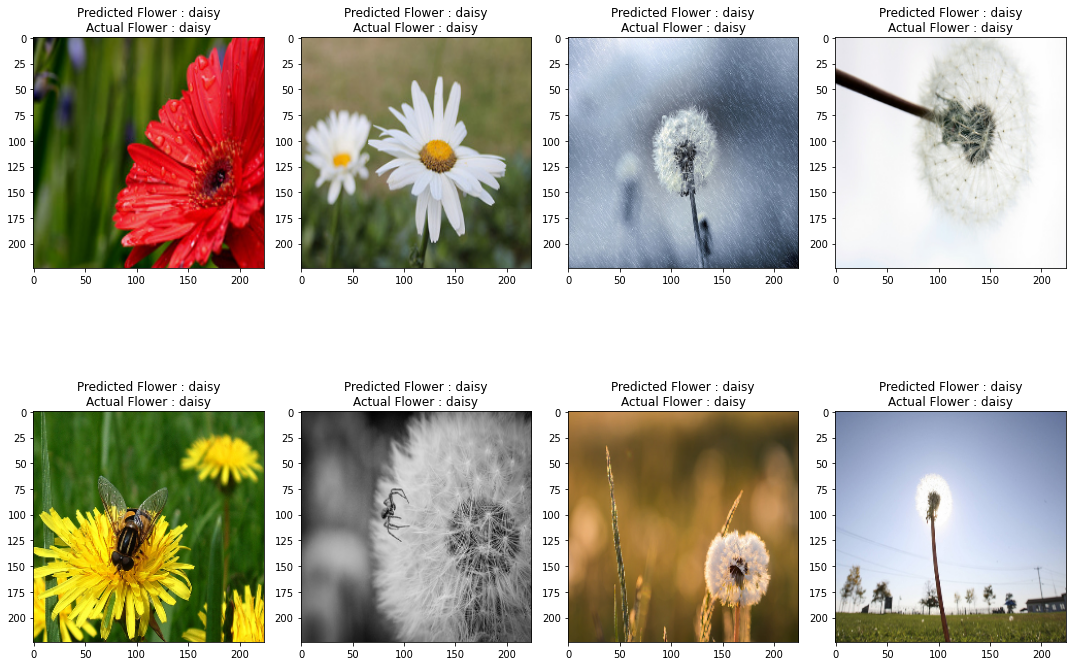

In [ ]:

##Plot Correctly classified images
count=0
fig,ax=plt.subplots(2,4)
fig.set_size_inches(15,15)
for i in range (2):
    for j in range (4):
        ax[i,j].imshow(cv2.resize(plt.imread(prop_imgPaths[count]),(224,224)))

        ax[i,j].set_title("Predicted Flower : "+str(list(my_dict.keys())[list(my_dict.values()).index(pred_digits[prop_class[count]])])+"\n"+
                          "Actual Flower : "+str(list(my_dict.keys())[list(my_dict.values()).index(test_generator.classes[count])]))
        
        plt.tight_layout()
        count+=1

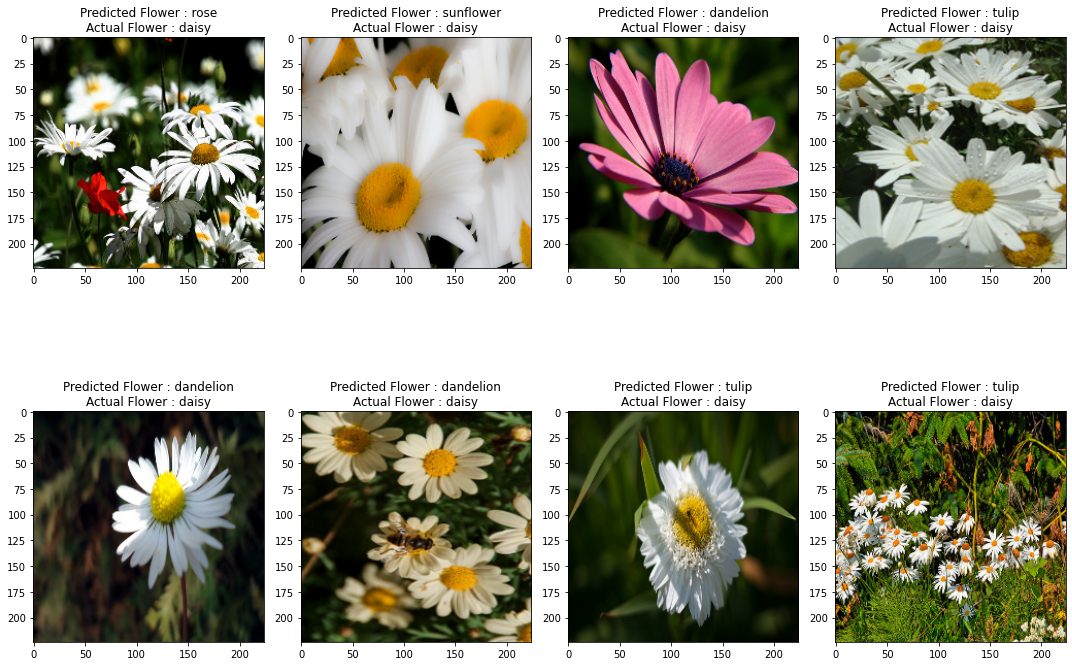

In [ ]:
##Missclassified Images
count=0
fig,ax=plt.subplots(2,4)
fig.set_size_inches(15,15)
for i in range (2):
    for j in range (4):
        ax[i,j].imshow(cv2.resize(plt.imread(mis_imgPath[count]),(224,224)))

        ax[i,j].set_title("Predicted Flower : "+str(list(my_dict.keys())[list(my_dict.values()).index(pred_digits[mis_class[count]])])+"\n"+
                          "Actual Flower : "+str(list(my_dict.keys())[list(my_dict.values()).index(test_generator.classes[count])]))
        
        plt.tight_layout()
        count+=1

### ***5.4 Save the model***

In [ ]:
model.save('./model_from_stratch.h5')

## **6. Transfer Learning : Using Pre-trained model to improve model performance**

In [ ]:
tf.keras.backend.clear_session()

***Transfer learning refers to using a pretrained model on some other task for your own task.***

***What is a Pre-trained Model?***

A pre-trained model has been previously trained on a dataset and contains the weights and biases that represent the features of whichever dataset it was trained on. Learned features are often transferable to different data. For example, a model trained on a large dataset of bird images will contain learned features like edges or horizontal lines that you would be transferable your dataset.

***Why use a Pre-trained Model?***

Pre-trained models are beneficial to us for many reasons. By using a pre-trained model you are saving time. Someone else has already spent the time and compute resources to learn a lot of features and your model will likely benefit from it.


### ***6.1 VGG16*** 

**Steps :**

1. First import the VGG16 module from keras library ( I have imported it at start of notebook)

2. Next we need to specify if we want to use fully connected layers of VGG16 module, Here we won't use them as in our task we have  5 target classes and will add our own custom layers.(include_top = 'False')

3. Next Specify weights , this depends on if we need to load weights that were trained on Imagenet model (weights='imagenet') ,or you can load hthe path to the weights file to be loaded.( https://www.kaggle.com/keras/vgg16?select=vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5 )

4. Lastly specify the input shape tuple


In [ ]:
#use VGG16 pre-trained model
def create_Base_model_from_VGG16():
   
    model = VGG16(weights = "imagenet", include_top=False, input_shape = (224,224, 3))
    
    # don't train existing weights 
    for layer in model.layers:
      layer.trainable = False

    return model 
create_Base_model_from_VGG16().summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

The above is the summary of the base model . Next we will add layres on top of it

### ***6.2 Adding Fully Connected Custom Layers and Compile***

In [ ]:
## Adding custom layes to base model

def add_custom_layers():
    #Adding custom Layers 
    model = create_Base_model_from_VGG16()
    x = model.output
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(256, activation="relu")(x)
    predictions = tf.keras.layers.Dense(5, activation="softmax")(x)
    
    # creating the final model 
    final_model = tf.keras.models.Model(inputs = model.input, outputs = predictions)
    
    final_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
    
    return final_model

add_custom_layers().summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

Above is the complete model(VGG16 + custom layers ) summary built on top of VGG16 model

### ***6.3 Training the model***

In [ ]:
epochs = 25
start = time.time()

model_from_vgg16 = add_custom_layers()
history2 = model_from_vgg16.fit(train_generator,
                    epochs=epochs,
                    validation_data=validation_generator,
                    validation_steps=5,
                    verbose=1,
                    callbacks = callback_list # giving the callback list
                     )

end = time.time()
duration = end - start
print ('\n model from trained with VGG16 took %0.2f seconds (%0.1f minutes) to train for %d epochs'%(duration, duration/60, epochs) )

Epoch 1/25
95/95 [==============================] - 65s 570ms/step - loss: 1.6046 - accuracy: 0.5353 - val_loss: 0.8841 - val_accuracy: 0.6687

Epoch 00001: val_accuracy did not improve from 0.67500
Epoch 2/25
95/95 [==============================] - 50s 530ms/step - loss: 0.8107 - accuracy: 0.7098 - val_loss: 0.5627 - val_accuracy: 0.8375

Epoch 00002: val_accuracy improved from 0.67500 to 0.83750, saving model to ./best_weights.hdf5
Epoch 3/25
95/95 [==============================] - 50s 526ms/step - loss: 0.7250 - accuracy: 0.7324 - val_loss: 0.7114 - val_accuracy: 0.7437

Epoch 00003: val_accuracy did not improve from 0.83750
Epoch 4/25
95/95 [==============================] - 50s 525ms/step - loss: 0.6819 - accuracy: 0.7493 - val_loss: 0.6382 - val_accuracy: 0.7500

Epoch 00004: val_accuracy did not improve from 0.83750
Epoch 5/25
95/95 [==============================] - 50s 524ms/step - loss: 0.6601 - accuracy: 0.7456 - val_loss: 0.6916 - val_accuracy: 0.7500

Epoch 00005: val_ac

### ***6.4 Visualize the Performance results***

In [ ]:
train_acc,val_acc,train_loss,val_loss = get_history_data(history2)

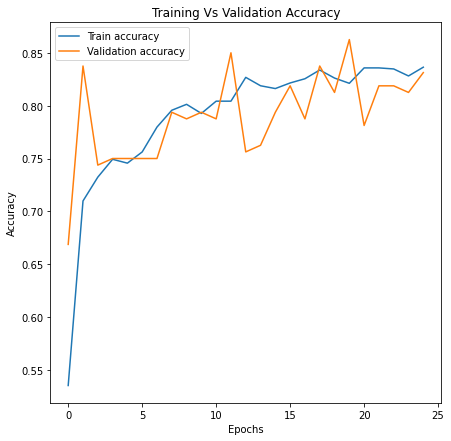

In [ ]:
#plot Accuracy graph
epochs = range(len(train_acc))
plt.figure(figsize=(7,7));
plt.plot(epochs,train_acc,label ='Train accuracy');
plt.plot(epochs,val_acc,label ='Validation accuracy');
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend();
plt.title('Training Vs Validation Accuracy');

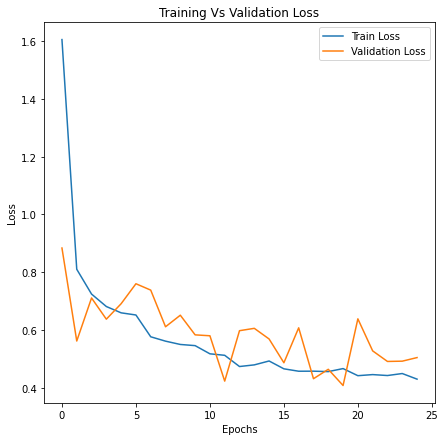

In [ ]:
#plot validation graph
plt.figure(figsize=(7,7));
plt.plot(epochs,train_loss,label ='Train Loss');
plt.plot(epochs,val_loss,label ='Validation Loss');
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend();
plt.title('Training Vs Validation Loss');

**From above plots , Increasing number of epochs would have improved performance more** 

### ***6.5 Evaluate the Model***

In [ ]:
model_from_vgg16.evaluate(test_generator)

14/14 [==============================] - 11s 791ms/step - loss: 0.4874 - accuracy: 0.8379


[0.48741772770881653, 0.8378995656967163]

### ***6.6 Perform Prediction on Test Data***

In [ ]:
import numpy as np

pred=model_from_vgg16.predict(test_generator)
pred_digits=np.argmax(pred,axis=1)
pred_digits[:5]

array([2, 4, 2, 3, 1])

### ***6.7 Plot Correctly Calssified Images and Miss-Classified Images***

In [ ]:
# now storing some properly as well as misclassified indexes'.
i=0
prop_class=[]
prop_imgPaths=[]
mis_class=[]
mis_imgPath=[]

for i in range(len(test_generator.classes)):
    if(np.argmax(test_generator.classes[i])==pred_digits[i]):
        prop_class.append(i)
        prop_imgPaths.append(test_generator.filepaths[i])
    if(len(prop_class)==8):
        break


for i in range(len(test_generator.classes)):
    if(not np.argmax(test_generator.classes[i])==pred_digits[i]):
        mis_class.append(i)
        mis_imgPath.append(test_generator.filepaths[i])
    if(len(mis_class)==20):
        break

In [ ]:
my_dict = test_generator.class_indices
my_dict

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

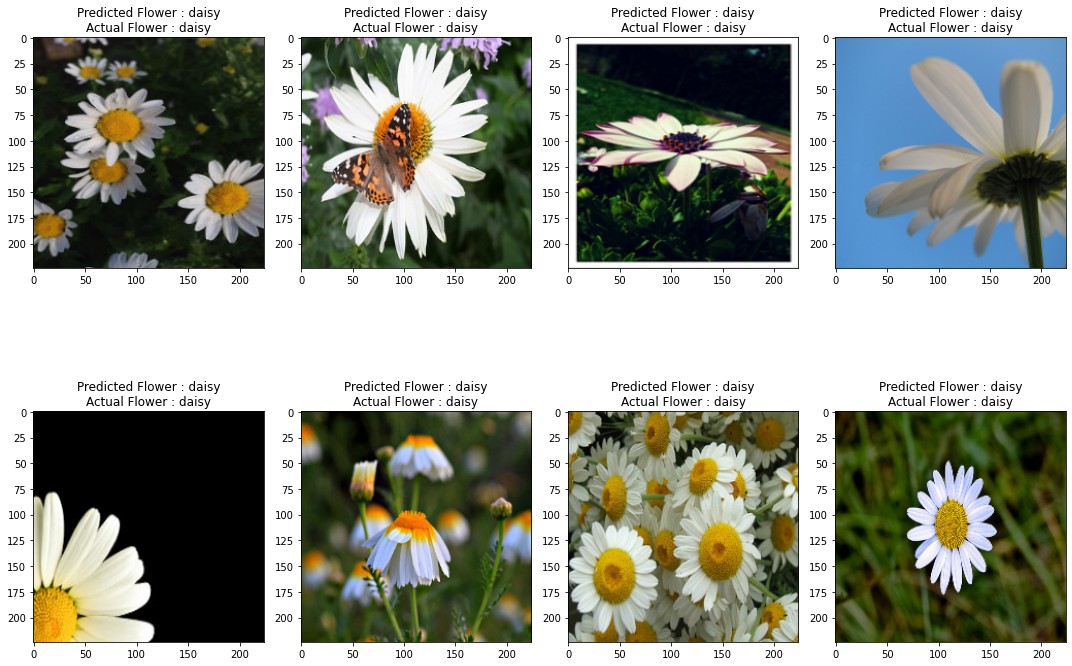

In [ ]:

##Plot Correctly classified images
count=0
fig,ax=plt.subplots(2,4)
fig.set_size_inches(15,15)
for i in range (2):
    for j in range (4):
        ax[i,j].imshow(cv2.resize(plt.imread(prop_imgPaths[count]),(224,224)))

        ax[i,j].set_title("Predicted Flower : "+str(list(my_dict.keys())[list(my_dict.values()).index(pred_digits[prop_class[count]])])+"\n"+
                          "Actual Flower : "+str(list(my_dict.keys())[list(my_dict.values()).index(test_generator.classes[count])]))
        
        plt.tight_layout()
        count+=1

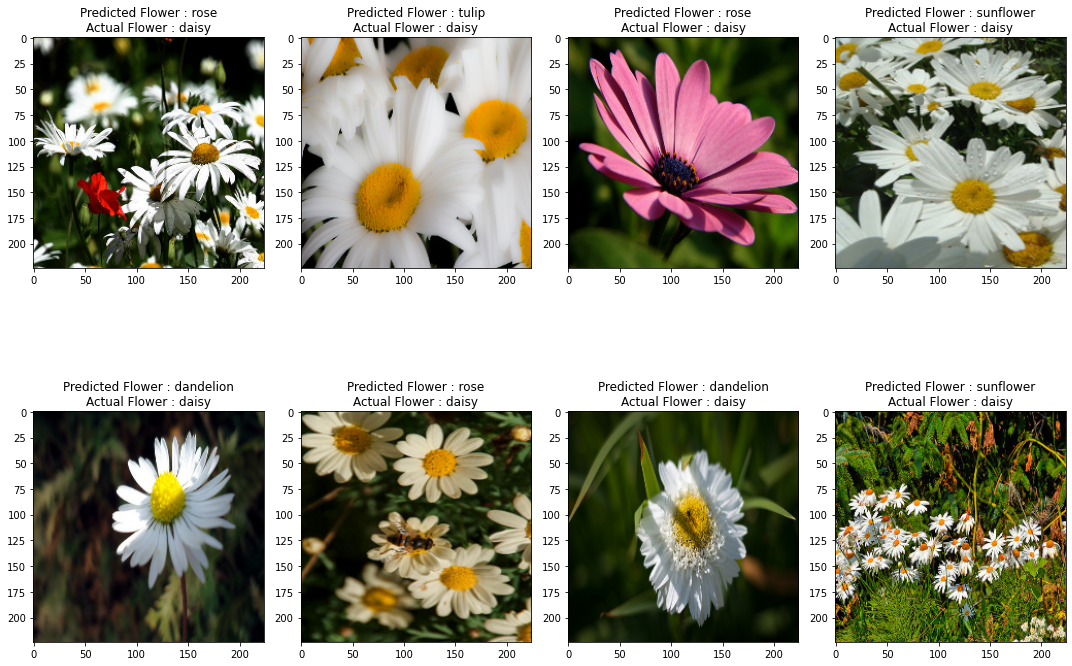

In [ ]:
##Missclassified Images
count=0
fig,ax=plt.subplots(2,4)
fig.set_size_inches(15,15)
for i in range (2):
    for j in range (4):
        ax[i,j].imshow(cv2.resize(plt.imread(mis_imgPath[count]),(224,224)))

        ax[i,j].set_title("Predicted Flower : "+str(list(my_dict.keys())[list(my_dict.values()).index(pred_digits[mis_class[count]])])+"\n"+
                          "Actual Flower : "+str(list(my_dict.keys())[list(my_dict.values()).index(test_generator.classes[count])]))
        
        plt.tight_layout()
        count+=1

### ***6.8 Save the model***

In [ ]:
model.save('./model_from_VGG16.h5')

## **7. Test model by uploading random images**

In [ ]:
try:
  #used model trained using vgg16 as it performed well on both train and test data
  labels = ['Daisy','Dadelion','Rose','Sunflower','Tulip'] #classes

  def classify_image(inp):
    img = inp.reshape((-1,224,224,3)) #reshape input image
    prediction = model_from_vgg16.predict(img).flatten() #prediction
    return {labels[i]: float(prediction[i]) for i in range(5)} #return classes

  image = gr.inputs.Image(shape=(224, 224))
  label = gr.outputs.Label(num_top_classes=1)

  gr.Interface(fn=classify_image, inputs=image, outputs=label, capture_session=True).launch(debug=True,share=True)

except KeyboardInterrupt:
      # do nothing here
      pass

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
This share link will expire in 24 hours. If you need a permanent link, visit: https://gradio.app/introducing-hosted (NEW!)
Running on External URL: https://35933.gradio.app
Interface loading below...


***Here are few Screen Catupres for the results :***

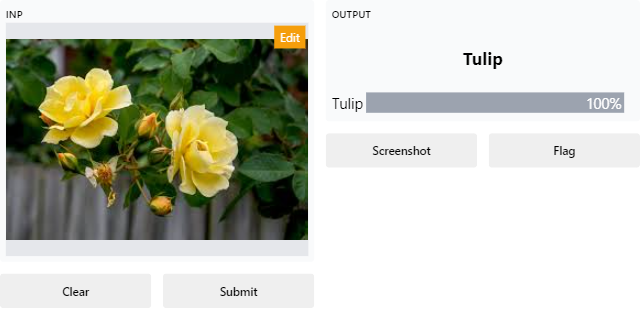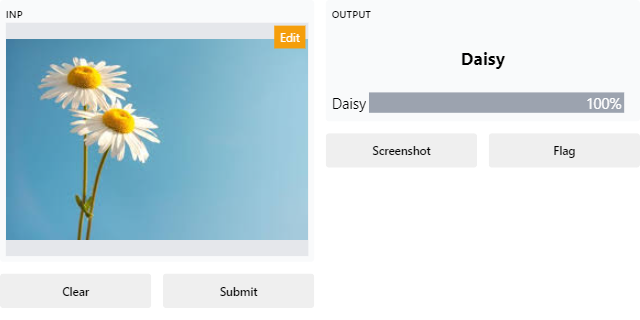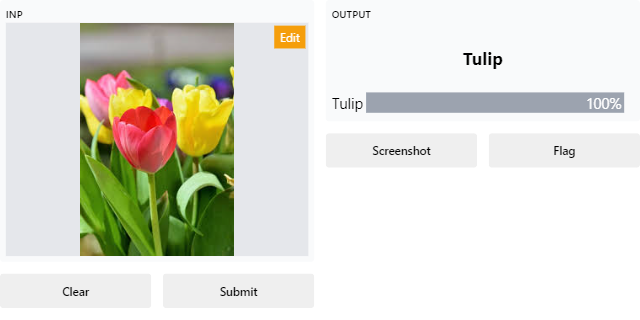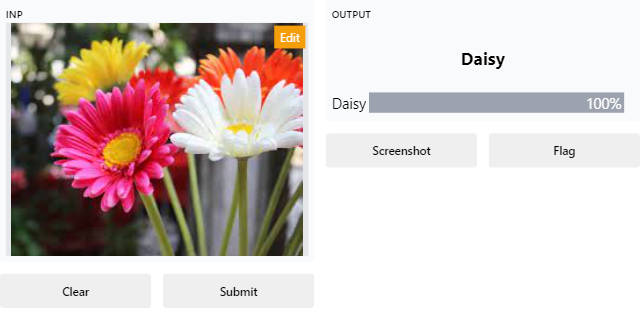

## **8. Conclusion :**

* **Here, Multiclass classification model for classifiying flowers into five classes was created.**

* **Initially CNN model from scratch was built which obtained 0.6479 training accuracy and 0.6438 as validation accuracy**

* **To further improve this ,transfer learing method with VGG16 pre trained model was immplemented.The model was built on top of VGG16 with our own custom layers on top of it and the pre-trained weights from imagenet.**

* **Using transfer learning - model performance was improved by 39% with training accuracy of 0.8364 and  0.8313 validation accuracy.**

* **The reason for performance degradation could be the noise in images.
Model performace can be further improved more by increasing the eposchs , increasing the layers and filters size.**


### **9. Resources :**

**Articles referred**:

* Understand CNN : https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53

* Data Augmentation Tutorial - https://www.tensorflow.org/tutorials/images/data_augmentation

* https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

* Transfer Learning : https://towardsdatascience.com/a-comprehensive-hands-on-guide-to-transfer-learning-with-real-world-applications-in-deep-learning-212bf3b2f27a

* Guide to VGG16 keras : https://keras.io/api/applications/vgg/